In [1]:
!pip install pandas matplotlib

In [3]:
import pandas as pd
import sqlite3 as sqlite
import matplotlib.pyplot as plt

In [19]:
data = [
    [1, "2025-08-01", "Coffee", 2, 5.0],
    [2, "2025-08-01", "Tea", 1, 10.0],
    [3, "2025-08-02", "Muffin", 3, 15.0],
    [4, "2025-08-02", "Sandwich", 1, 40.0],
    [5, "2025-08-03", "Cookie", 4, 35.0],
]
df = pd.DataFrame(data, columns=["order_id", "order_date", "product", "quantity", "price"])
df

,order_id,order_date,product,quantity,price
0,1,2025-08-01,Coffee,2,5.0
1,2,2025-08-01,Tea,1,10.0
2,3,2025-08-02,Muffin,3,15.0
3,4,2025-08-02,Sandwich,1,40.0
4,5,2025-08-03,Cookie,4,35.0


In [21]:
conn = sqlite.connect("sales_data.db")

In [23]:
df.to_sql("sales", conn , if_exists ="replace" ,index = False)

5

In [25]:
pd.read_sql_query("select * from sales;",conn)

,order_id,order_date,product,quantity,price
0,1,2025-08-01,Coffee,2,5.0
1,2,2025-08-01,Tea,1,10.0
2,3,2025-08-02,Muffin,3,15.0
3,4,2025-08-02,Sandwich,1,40.0
4,5,2025-08-03,Cookie,4,35.0


In [27]:
query_product = """
select
  product,
  sum(quantity) AS total_qty,
  sum(quantity * price) AS revenue
from sales
group by product
order by revenue desc;
"""
df_product = pd.read_sql_query(query_product, conn)
df_product

,product,total_qty,revenue
0,Cookie,4,140.0
1,Muffin,3,45.0
2,Sandwich,1,40.0
3,Tea,1,10.0
4,Coffee,2,10.0


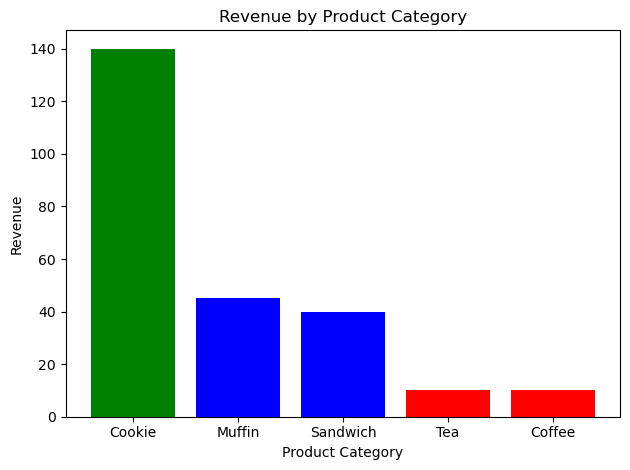

In [31]:
plt.figure()
colors = []
max_rev = df_product["revenue"].max()
min_rev = df_product["revenue"].min()

for rev in df_product["revenue"]:
    if rev == max_rev:
        colors.append("green")
    elif rev == min_rev:
        colors.append("red")
    else:
        colors.append("blue")

plt.bar(df_product["product"], df_product["revenue"], color=colors)
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

**Observation:** Cookies are the top revenue driver, while Tea and Coffee underperform